In [ ]:
# Загрузка Библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import time

Ответим на следующие вопросы:
*   Каково содержание данных?
*   Как распределяются числовые атрибуты?
*   Как распределяются категориальные атрибуты?
*   Как влияет риск и сумма кредита на другие функции?
*   Существует ли какая-либо другая закономерность, которая может быть связана с кредитным риском


In [ ]:
df = pd.read_csv('/content/german_credit_data.csv', index_col=0)


# Results
print(f'Data dimension: {df.shape}')
df.head()

Data dimension: (1000, 10)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [ ]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [ ]:
df.isnull().sum()


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
for col in list(df):
    print(col)
    print(df[col].unique())

Age
[67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
Sex
['male' 'female']
Job
[2 1 3 0]
Housing
['own' 'free' 'rent']
Saving accounts
[nan 'little' 'quite rich' 'rich' 'moderate']
Checking account
['little' 'moderate' nan 'rich']
Credit amount
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6

In [ ]:
missing_values=pd.DataFrame({'Missing Values':df.isnull().sum(),'Missing % Values':(df.isnull().sum()/1000)*100})
missing_values

,Missing Values,Missing % Values
Age,0,0.0
Sex,0,0.0
Job,0,0.0
Housing,0,0.0
Saving accounts,183,18.3
Checking account,394,39.4
Credit amount,0,0.0
Duration,0,0.0
Purpose,0,0.0
Risk,0,0.0


In [ ]:
numerical = ['Credit amount','Age','Duration']
categorical = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
df.shape

(1000, 10)

In [ ]:
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

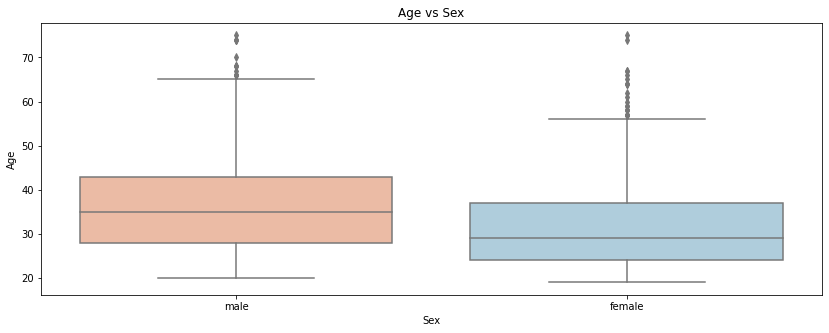

In [ ]:
plt.figure(figsize=(14,5))
gx=sns.boxplot(x='Sex', y='Age', data=df, palette="RdBu")
gx.set_title("Age vs Sex")
gx.set_ylabel("Age")
gx.set_xlabel("Sex")
plt.show()
#This plot shows how many people are male and female within the specified age.

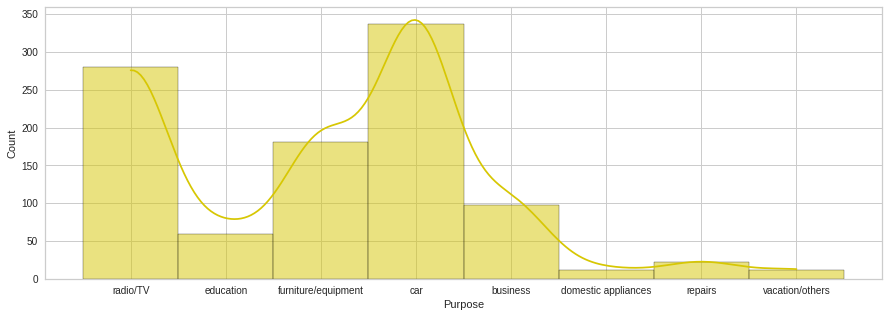

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="Purpose", kde=True, color="y")
# This plot shows the purpose of loan that people took.

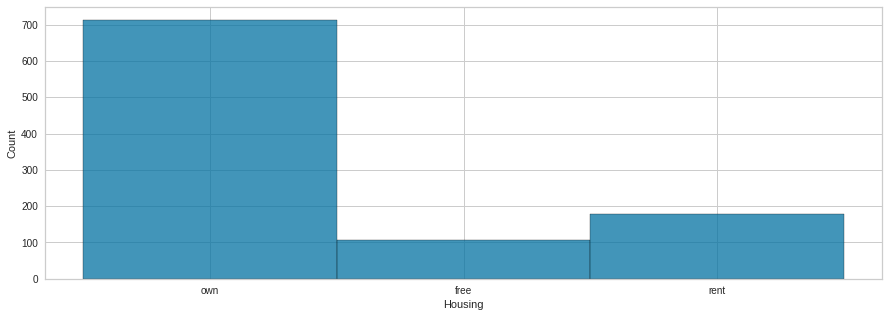

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="Housing", color="b")
# This plot shows how many people own the house and how many are on rent or free.

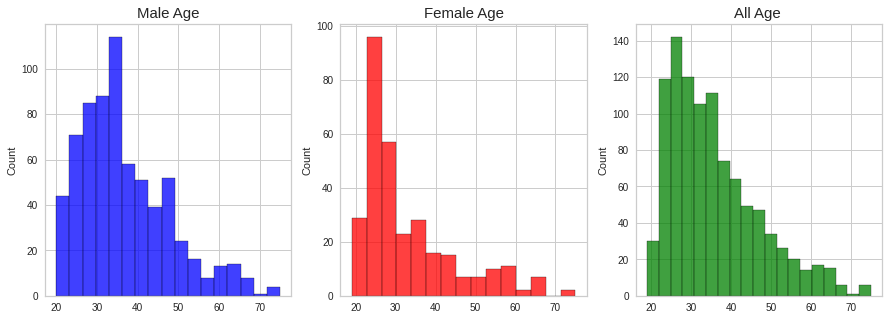

In [ ]:
male_age = df["Age"].loc[df["Sex"] == "male"].values
female_age = df["Age"].loc[df["Sex"] == "female"].values
All_age = df['Age'].values
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(male_age,ax=ax[0],color="blue")
ax[0].set_title("Male Age", fontsize=15)
sns.histplot(female_age, ax=ax[1], color="red")
ax[1].set_title("Female Age", fontsize=15)
sns.histplot(All_age, ax=ax[2], color="green")
ax[2].set_title("All Age ", fontsize=15)
plt.show()
# This plot shows what kind of people(men or female) have taken loan the most with respect to their age.

In [ ]:
df["Purpose"].unique()
sex_purpose = pd.crosstab(df['Purpose'], df['Sex'])
display(sex_purpose)
#This Frame Shows the purpose of having credits for each gender

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [ ]:
number_of_jobs = pd.crosstab(df["Job"], df["Sex"])
number_of_jobs
#This Frame Shows the No of Jobs for each gender

Sex,female,male
Job,,
0,12,10
1,64,136
2,197,433
3,37,111


In [ ]:
#dividing Age groups into different categories
df['Age_Group'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder'

df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,little,little,1169,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,little,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,4870,24,car,bad,Senior
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,good,Young Adults
996,40,male,3,own,little,little,3857,30,car,good,Young Adults
997,38,male,2,own,little,little,804,12,radio/TV,good,Young Adults
998,23,male,2,free,little,little,1845,45,radio/TV,bad,Young


**Поиск коррелированных переменных и переменных, наиболее сильно влияющих на целевую переменную**

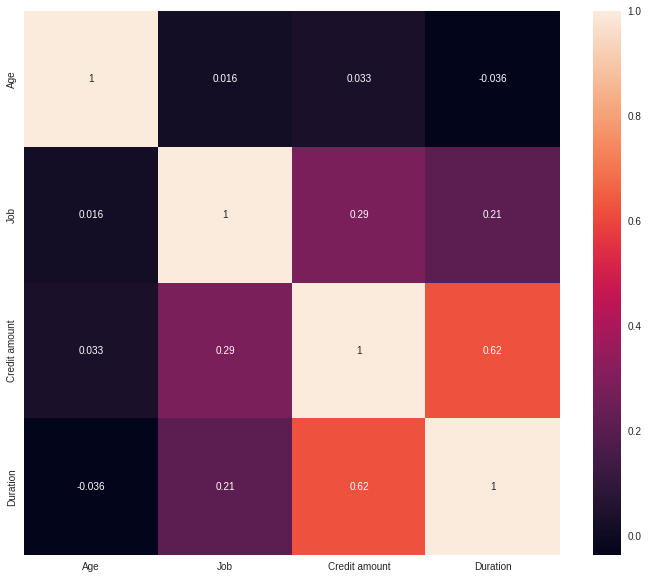

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

Атрибуты суммы кредита и продолжительности имеют сильную положительную взаимосвязь. Чем больше сумма кредита, тем больше будет его продолжительность.
Сумма и продолжительность кредита имеют отрицательную корреляцию с целевой переменной (Риском), что означает, что люди, имеющие более крупные кредитные ссуды, имеют более высокий риск.
Больший срок кредита ведет к плохому риску.
Цель кридита не имеет никакого отношения к целевой переменной (риску)

In [ ]:
groupby_by_purpose = df.groupby(['Risk', 'Purpose'])['Credit amount'].count().reset_index()
groupby_by_purpose = pd.pivot_table(groupby_by_purpose, values='Credit amount'\
                                    , index='Purpose',columns='Risk').sort_values(by = 'good')
groupby_by_purpose

Risk,bad,good
Purpose,,
vacation/others,5,7
domestic appliances,4,8
repairs,8,14
education,23,36
business,34,63
furniture/equipment,58,123
radio/TV,62,218
car,106,231


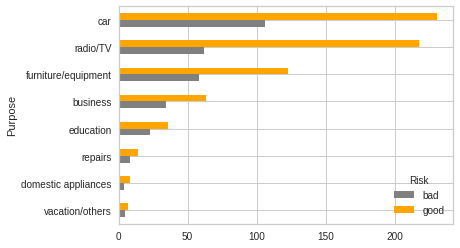

In [ ]:
groupby_by_purpose.plot.barh(color = ['grey', 'orange'])

# Методы машинного обучения для задачи классификации
---
Так как данные были предварительно обработаны, то алгоритм обучения модели на языке Пайтон будет следующий:

Подключаем соответствующие библиотеки.

Преобразовываем категориальные признаки в числовые, так как компьютер может работать только с числовыми значениями.

Выделяем целевую переменную и остальные признаки.

Разбиваем нашу выборку на обучающую и тестовую в пропорции 80% и 20%.

Далее обучаем наши модели на обучающей выборке, с помощью оператора fit

Предсказываем результаты на тестовой выборке, с помощью оператора predict
Выводим метрики обучения.

Делаем выводы.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC
from yellowbrick.features import FeatureImportances

In [ ]:
df_clean=df.copy()

In [ ]:
cat_features = ['Sex','Housing', 'Saving accounts', 'Checking account','Purpose']
num_features=['Age', 'Job', 'Credit amount', 'Duration','Risk']
for variable in cat_features:
    dummies = pd.get_dummies(df_clean[cat_features])
    df1= pd.concat([df_clean[num_features], dummies],axis=1)
Risk= df1['Risk']
df2=df1.drop(['Risk'],axis=1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df2,Risk,test_size=0.20,random_state = 30)

In [ ]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
probabilities = model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print ("\n Classification report : \n",classification_report(Y_test,predictions))
print ("Accuracy Score   : ",accuracy_score(Y_test,predictions))


 Classification report : 
               precision    recall  f1-score   support

         bad       0.57      0.27      0.36        64
        good       0.72      0.90      0.80       136

    accuracy                           0.70       200
   macro avg       0.65      0.59      0.58       200
weighted avg       0.67      0.70      0.66       200

Accuracy Score   :  0.7


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
#Train the model using the training sets
knn.fit(X_train, Y_train)

#Predict the response for test dataset
predictions  = knn.predict(X_test)
probabilities = model.predict_proba(X_test)
#fpr,tpr,thresholds = roc_curve(Y_test,probabilities[:,1])

In [ ]:
print ("\n Classification report : \n",classification_report(Y_test,predictions))
print ("Accuracy Score   : ",accuracy_score(Y_test,predictions))


 Classification report : 
               precision    recall  f1-score   support

         bad       0.47      0.14      0.22        64
        good       0.70      0.93      0.79       136

    accuracy                           0.68       200
   macro avg       0.58      0.53      0.51       200
weighted avg       0.62      0.68      0.61       200

Accuracy Score   :  0.675


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Model Training
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, Y_train);

#Prediction
predictions_rfc = model_rfc.predict(X_test)
probabilities = model_rfc.predict_proba(X_test)

In [ ]:
print ("\n Classification report : \n",classification_report(Y_test,predictions_rfc))
print ("Accuracy Score   : ",accuracy_score(Y_test,predictions_rfc))


 Classification report : 
               precision    recall  f1-score   support

         bad       0.58      0.22      0.32        64
        good       0.72      0.93      0.81       136

    accuracy                           0.70       200
   macro avg       0.65      0.57      0.56       200
weighted avg       0.67      0.70      0.65       200

Accuracy Score   :  0.7
